In [6]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [7]:
df = pd.read_csv('housing.csv')

In [8]:
df.head()

,Price,Beds,Baths,Sqft
0,"$255,000",3bed,2bath,"1,214sqft"
1,"$495,000",4bed,2.5bath,"3,099sqft"
2,"$425,000",4bed,2bath,"1,669sqft"
3,"$279,000",3bed,1.5bath,"1,140sqft"
4,"$570,000",3bed,2bath,"1,801sqft"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   42 non-null     object
 1   Beds    42 non-null     object
 2   Baths   42 non-null     object
 3   Sqft    42 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [10]:
df.describe()

,Price,Beds,Baths,Sqft
count,42,42,42,42
unique,41,6,8,42
top,"$310,000",4bed,2bath,"1,214sqft"
freq,2,15,22,1


In [11]:
#df["Price"] = pd.to_numeric(df["Price"], errors='coerce').fillna(0, downcast='infer')
#df["Beds"] = pd.to_numeric(df["Beds"], errors='coerce').fillna(0, downcast='infer')
#df["Baths"] = pd.to_numeric(df["Baths"], errors='coerce').fillna(0, downcast='infer')
#df["Sqft"] = pd.to_numeric(df["Sqft"], errors='coerce').fillna(0, downcast='infer')
#df1 = pd.get_dummies(df['Price'])

def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

df['Price'] = df['Price'].apply(clean_currency).astype('float')


In [12]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('bed', '').replace(',', ''))
    return(x)

df['Beds'] = df['Beds'].apply(clean_currency).astype('float')

In [13]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('bath', '').replace(',', ''))
    return(x)

df['Baths'] = df['Baths'].apply(clean_currency).astype('float')

In [14]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('sqft', '').replace(',', ''))
    return(x)

df['Sqft'] = df['Sqft'].apply(clean_currency).astype('float')

In [15]:
df.head()

,Price,Beds,Baths,Sqft
0,255000.000,3.000,2.000,1214.000
1,495000.000,4.000,2.500,3099.000
2,425000.000,4.000,2.000,1669.000
3,279000.000,3.000,1.500,1140.000
4,570000.000,3.000,2.000,1801.000


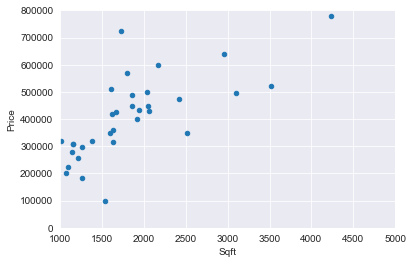

In [16]:
var = 'Sqft'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000),xlim=(1000,5000));


 mu = 444116.40 and sigma = 245833.54



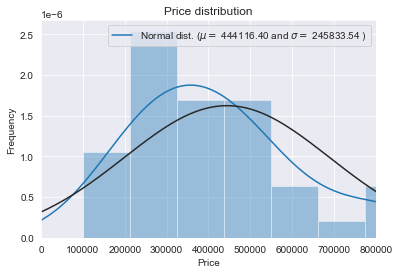

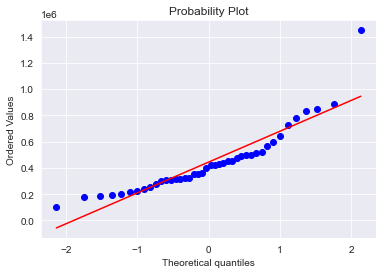

In [26]:
sns.distplot(df['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.xlim(0,800000)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()


 mu = 12.87 and sigma = 0.51



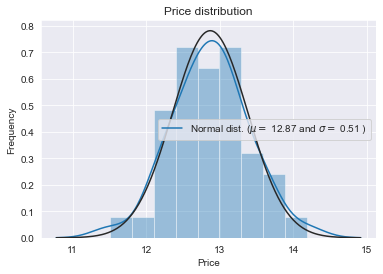

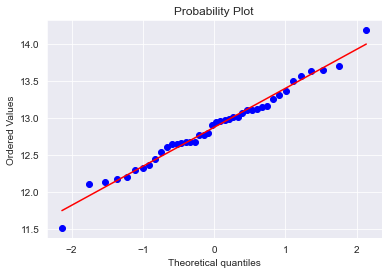

In [28]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["Price"] = np.log1p(df["Price"])

#Check the new distribution 
sns.distplot(df['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Beds'}>],
       [<AxesSubplot:title={'center':'Baths'}>,
        <AxesSubplot:title={'center':'Sqft'}>]], dtype=object)

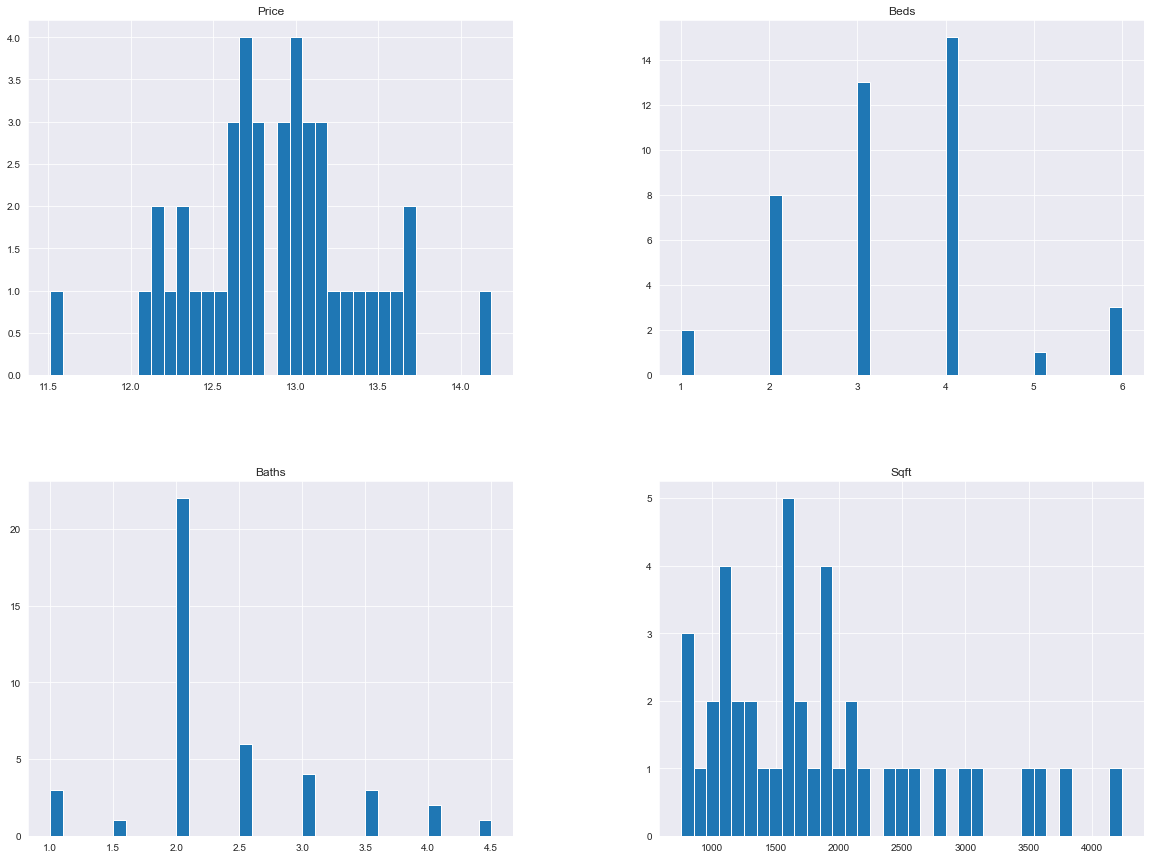

In [31]:
df.hist(bins=35,figsize=(20,15))

In [32]:
df.columns

Index(['Price', 'Beds', 'Baths', 'Sqft'], dtype='object')

In [33]:
X = df[['Beds','Baths','Sqft']]

In [34]:
y = df['Price']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
print(lm.intercept_)

11.407682027093834


In [41]:
lm.coef_

array([0.17263048, 0.06155022, 0.00039898])

In [42]:
X.columns

Index(['Beds', 'Baths', 'Sqft'], dtype='object')

In [43]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])

In [44]:
cdf

,Coeff
Beds,0.173
Baths,0.062
Sqft,0.000


In [45]:
predictions = lm.predict(X_test)

In [46]:
predictions

array([13.48853395, 11.9506771 , 13.42839375, 13.02536565, 12.90915449,
       12.47274167, 12.31213401, 14.09369393, 12.69862044, 14.34978902,
       12.24709946, 12.15003957, 12.82270477, 12.62388023, 12.40953961,
       12.85768543, 12.98735555])

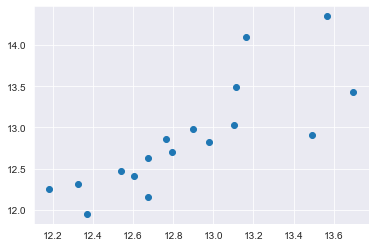

In [47]:
plt.scatter(y_test,predictions)

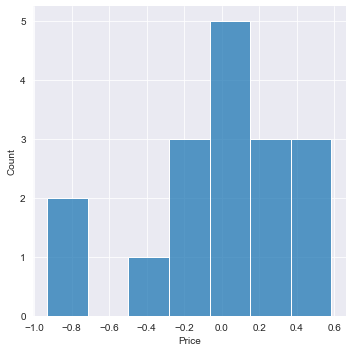

In [54]:
sns.displot((y_test-predictions))

In [49]:
from sklearn import metrics

In [50]:
metrics.mean_absolute_error(y_test,predictions)

0.2817875751436748

In [51]:
metrics.mean_squared_error(y_test,predictions)

0.1526130681542827

In [52]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.39065722590819013